# 下準備

## OpenCVのインストール

In [0]:
!pip install opencv-python

## バージョンの確認

In [0]:
import cv2

print(cv2.__version__)

3.4.3


In [0]:
import cv2
import matplotlib.pyplot as plt

## サンプル画像のダウンロード


In [0]:
!wget https://github.com/kawashimaken/photos/raw/master/kawashima01.jpg

--2019-05-20 01:30:31--  https://github.com/kawashimaken/photos/raw/master/kawashima01.jpg
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kawashimaken/photos/master/kawashima01.jpg [following]
--2019-05-20 01:30:36--  https://raw.githubusercontent.com/kawashimaken/photos/master/kawashima01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16073 (16K) [image/jpeg]
Saving to: ‘kawashima01.jpg’

kawashima01.jpg     100%[===================>]  15.70K  --.-KB/s    in 0s      

2019-05-20 01:30:37 (162 MB/s) - ‘kawashima01.jpg’ saved [16073/16073]



## 画像のアップロード

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
ls

kawashima01.jpg  sample_data/


# 調理手順

## 画像の取込み

In [0]:
img_bgr = cv2.imread('kawashima01.jpg')
print(img_bgr)

[[[183 219 219]
  [178 214 214]
  [168 206 206]
  ...
  [255 253 253]
  [255 252 252]
  [255 250 250]]

 [[175 212 216]
  [170 209 211]
  [164 202 206]
  ...
  [255 251 251]
  [255 251 251]
  [255 250 250]]

 [[163 204 213]
  [161 203 210]
  [157 198 207]
  ...
  [255 247 247]
  [255 249 249]
  [255 251 251]]

 ...

 [[226 216 255]
  [202 190 255]
  [170 154 232]
  ...
  [158 165 198]
  [187 195 225]
  [207 217 247]]

 [[224 215 255]
  [200 189 252]
  [166 150 227]
  ...
  [143 149 186]
  [177 183 218]
  [203 212 245]]

 [[223 214 255]
  [197 186 248]
  [164 148 225]
  ...
  [134 139 178]
  [171 177 214]
  [200 209 243]]]


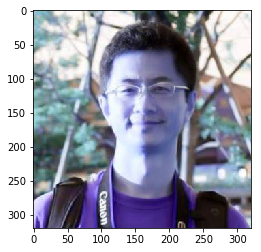

In [0]:
plt.imshow(img_bgr)
plt.show()

In [0]:
import numpy as np

x = np.array(img_bgr)
print(x.shape)

(320, 320, 3)


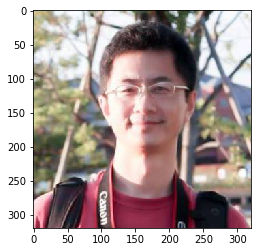

In [0]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);
plt.show()

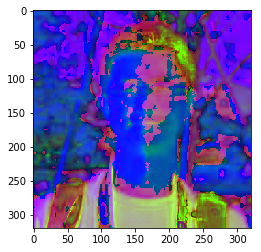

In [0]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

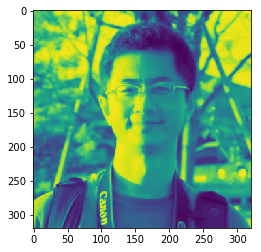

In [0]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

## 画像の保存

In [0]:
cv2.imwrite('gray_kawashima.jpg', img_gray)

True

In [0]:
ls

gray_kawashima.jpg  kawashima01.jpg  sample_data/


## トリミング

In [0]:
img_bgr = cv2.imread('kawashima01.jpg')

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

size=img_rgb.shape
print(size)

(160, 160, 3)


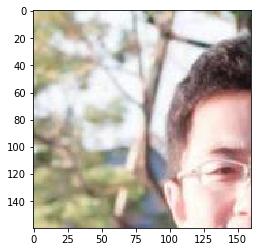

In [0]:
new_img = img_rgb[:size[0] // 2, : size[1] // 2]
print(new_img.shape)
#
plt.imshow(new_img);
plt.show()

(160, 160, 3)


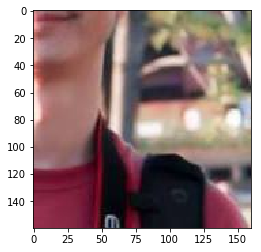

In [0]:
new_img = img_rgb[size[0] // 2:, size[1] // 2:]
print(new_img.shape)
#
plt.imshow(new_img)
plt.show()

## リサイズ

(320, 320, 3)
(640, 640, 3)


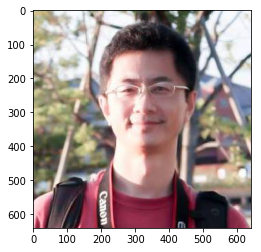

In [0]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

size = img_rgb.shape
print(size)
resized_img = cv2.resize(img_rgb, (img_rgb.shape[1] * 2, img_rgb.shape[0] * 2))
print(resized_img.shape)
#
plt.imshow(resized_img)
plt.show()

(80, 80, 3)


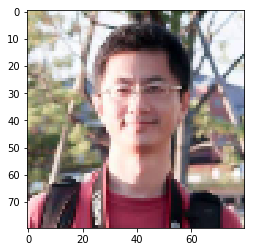

In [0]:
resized_img = cv2.resize(img_rgb, (img_rgb.shape[1] // 4, img_rgb.shape[0] // 4))
print(resized_img.shape)
#
plt.imshow(resized_img)
plt.show()

## 画像の回転

In [0]:
import numpy as np
import matplotlib.pyplot as plt

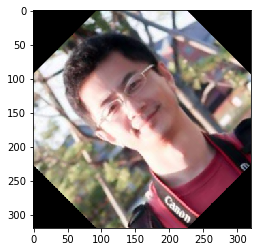

In [0]:
img_bgr = cv2.imread('kawashima01.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#
mat = cv2.getRotationMatrix2D(tuple(np.array(img_rgb.shape[:2]) / 2), 45, 1.0)

result_img = cv2.warpAffine(img_rgb, mat, img_rgb.shape[:2])

#
plt.imshow(result_img)
plt.show()

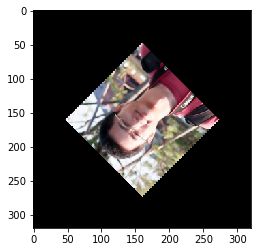

In [0]:
#
mat = cv2.getRotationMatrix2D(tuple(np.array(img_rgb.shape[:2]) / 2), 135, 0.5)

result_img = cv2.warpAffine(img_rgb, mat,img_rgb.shape[:2])

#
plt.imshow(result_img)
plt.show()

## 色調変換

In [0]:
import numpy as np
import matplotlib.pyplot as plt

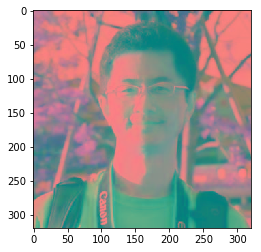

In [0]:
img_bgr = cv2.imread('kawashima01.jpg')
#
result_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

#
plt.imshow(result_img)
plt.show()

## ２値化


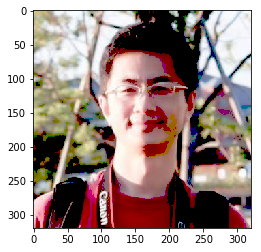

In [0]:
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('kawashima01.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#
retval,result_img = cv2.threshold(img_rgb, 95, 128, cv2.THRESH_TOZERO)

#
plt.imshow(result_img)
plt.show()

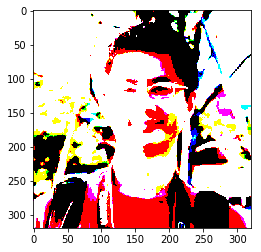

In [0]:
#
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
retval, result_img = cv2.threshold(img_rgb, 100, 255, cv2.THRESH_BINARY)

#
plt.imshow(result_img)
plt.show()

## ぼかし

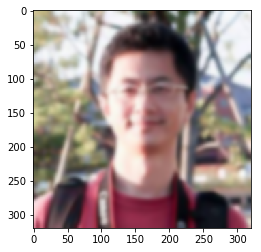

In [0]:
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('kawashima01.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#
result_img = cv2.GaussianBlur(img_rgb, (15, 15), 0)

#
plt.imshow(result_img)
plt.show()

## ノイズの除去

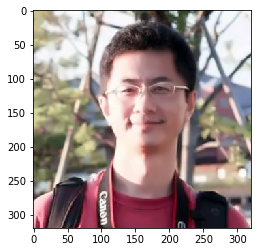

In [0]:
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('kawashima01.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#
result_img = cv2.fastNlMeansDenoisingColored(img_rgb)

#
plt.imshow(result_img)
plt.show()

## 膨張・収縮

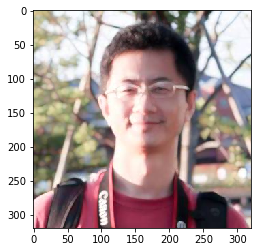

In [0]:
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('kawashima01.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#
filt = np.array([[0,1,0],
                 [1,0,1],
                 [0,1,0]], np.uint8)
#
result_img = cv2.dilate(img_rgb, filt)

#
plt.imshow(result_img)
plt.show()

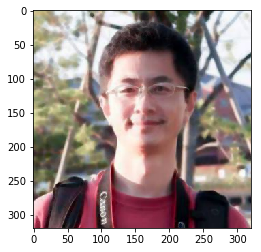

In [0]:
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('kawashima01.jpg')
img_rgb= cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#
filt = np.array([[0,1,0],
                 [1,0,1],
                 [0,1,0]], np.uint8)
#
result_img = cv2.erode(img_rgb, filt)

#
plt.imshow(result_img)
plt.show()

## 輪郭抽出


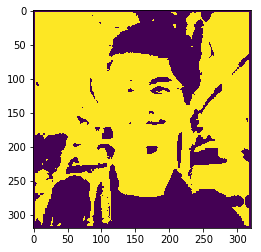

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
img_bgr = cv2.imread('kawashima01.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
retval, thresh = cv2.threshold(img_gray, 88, 255, 0)
img, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
result_img = cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
 
#
plt.imshow(result_img)
plt.show()

## 画像データの水増し

In [0]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
def  make_image(input_img):
  # 画像のサイズ
  img_size = input_img.shape
  filter_one = np.ones((3, 3))
    
  # 回転用
  mat1 = cv2.getRotationMatrix2D(tuple(np.array(input_img.shape[:2]) / 2), 23, 1)
  mat2 = cv2.getRotationMatrix2D(tuple(np.array(input_img.shape[:2]) / 2), 144, 0.8)


  # 水増しのメソッドに使う関数です
  fake_method_array = np.array([
    lambda image: cv2.warpAffine(image,mat1,image.shape[:2]),
    lambda image: cv2.warpAffine(image,mat2,image.shape[:2]),
    lambda image: cv2.threshold(image, 100, 255, cv2.THRESH_TOZERO)[1],
    lambda image: cv2.GaussianBlur(image, (5, 5), 0),
    lambda image: cv2.resize(cv2.resize(image, (img_size[1] // 5, img_size[0] // 5)),(img_size[1], img_size[0])),
    lambda image: cv2.erode(image, filter_one),
    lambda image: cv2.flip(image, 1),
    ])
    
  # 画像変換処理を実行します
  images = []

  for method in fake_method_array:
    faked_img = method(input_img)
    images.append(faked_img)
    
  return images

In [0]:
# 画像を読み込みます
target_img = cv2.imread("kawashima01.jpg")

# 画像を水増しします
fake_images = make_image(target_img)

# 画像を保存するフォルダを作成します
if not os.path.exists("fake_images"):
    os.mkdir("fake_images")

for number, img in enumerate(fake_images):
    # まず保存先のディレクトリ "fake_images/" を指定して番号を付けて保存します
    cv2.imwrite("fake_images/" + str(number) + ".jpg" ,img) 

**作成された水増しファイルの一覧を見るコマンド**

In [0]:
ls fake_images

0.jpg  1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg


**複数回実行するときに、一旦水増しファイルを消すコマンド**

In [0]:
#!rm fake_images/*

**作った水増し画像を一覧で見る**

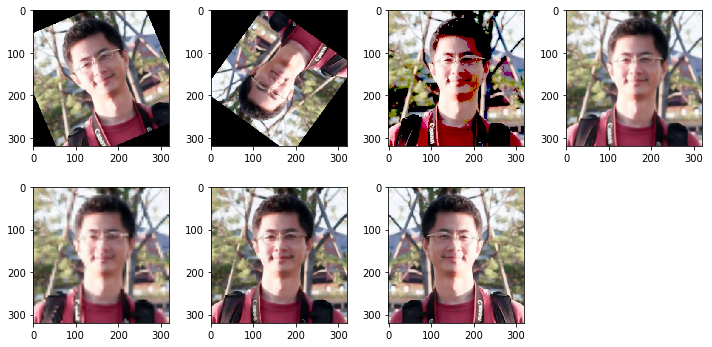

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 列の数を設定します
NUM_COLUMNS = 4
# 行
ROWS_COUNT = len(fake_images) % NUM_COLUMNS
# 列
COLUMS_COUNT = NUM_COLUMNS

# グラフオブジェクト保持用
subfig = [] 
# figureオブジェクト作成サイズを決めます
fig = plt.figure(figsize=(12, 9)) 


#
for i in range(1, len(fake_images) + 1):
   # 順序i番目のsubfig追加
    subfig.append(fig.add_subplot(ROWS_COUNT, COLUMS_COUNT, i))

    img_bgr = cv2.imread('fake_images/'+str(i-1)+'.jpg')
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    subfig[i-1].imshow(img_rgb)
    
# グラフ間の横とたての隙間の調整
fig.subplots_adjust(wspace=0.3, hspace=0.3) 
  
plt.show() 